In [ ]:
# Import libraries
import pandas as pd

# Loading the dataset.
data = pd.read_csv('Country-data.csv')

# Display the first few rows.
data.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Check data types
data.dtypes


country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [ ]:
# Drop non-numeric columns.
data = data.select_dtypes(include=['number'])

# Verify the change.
data.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


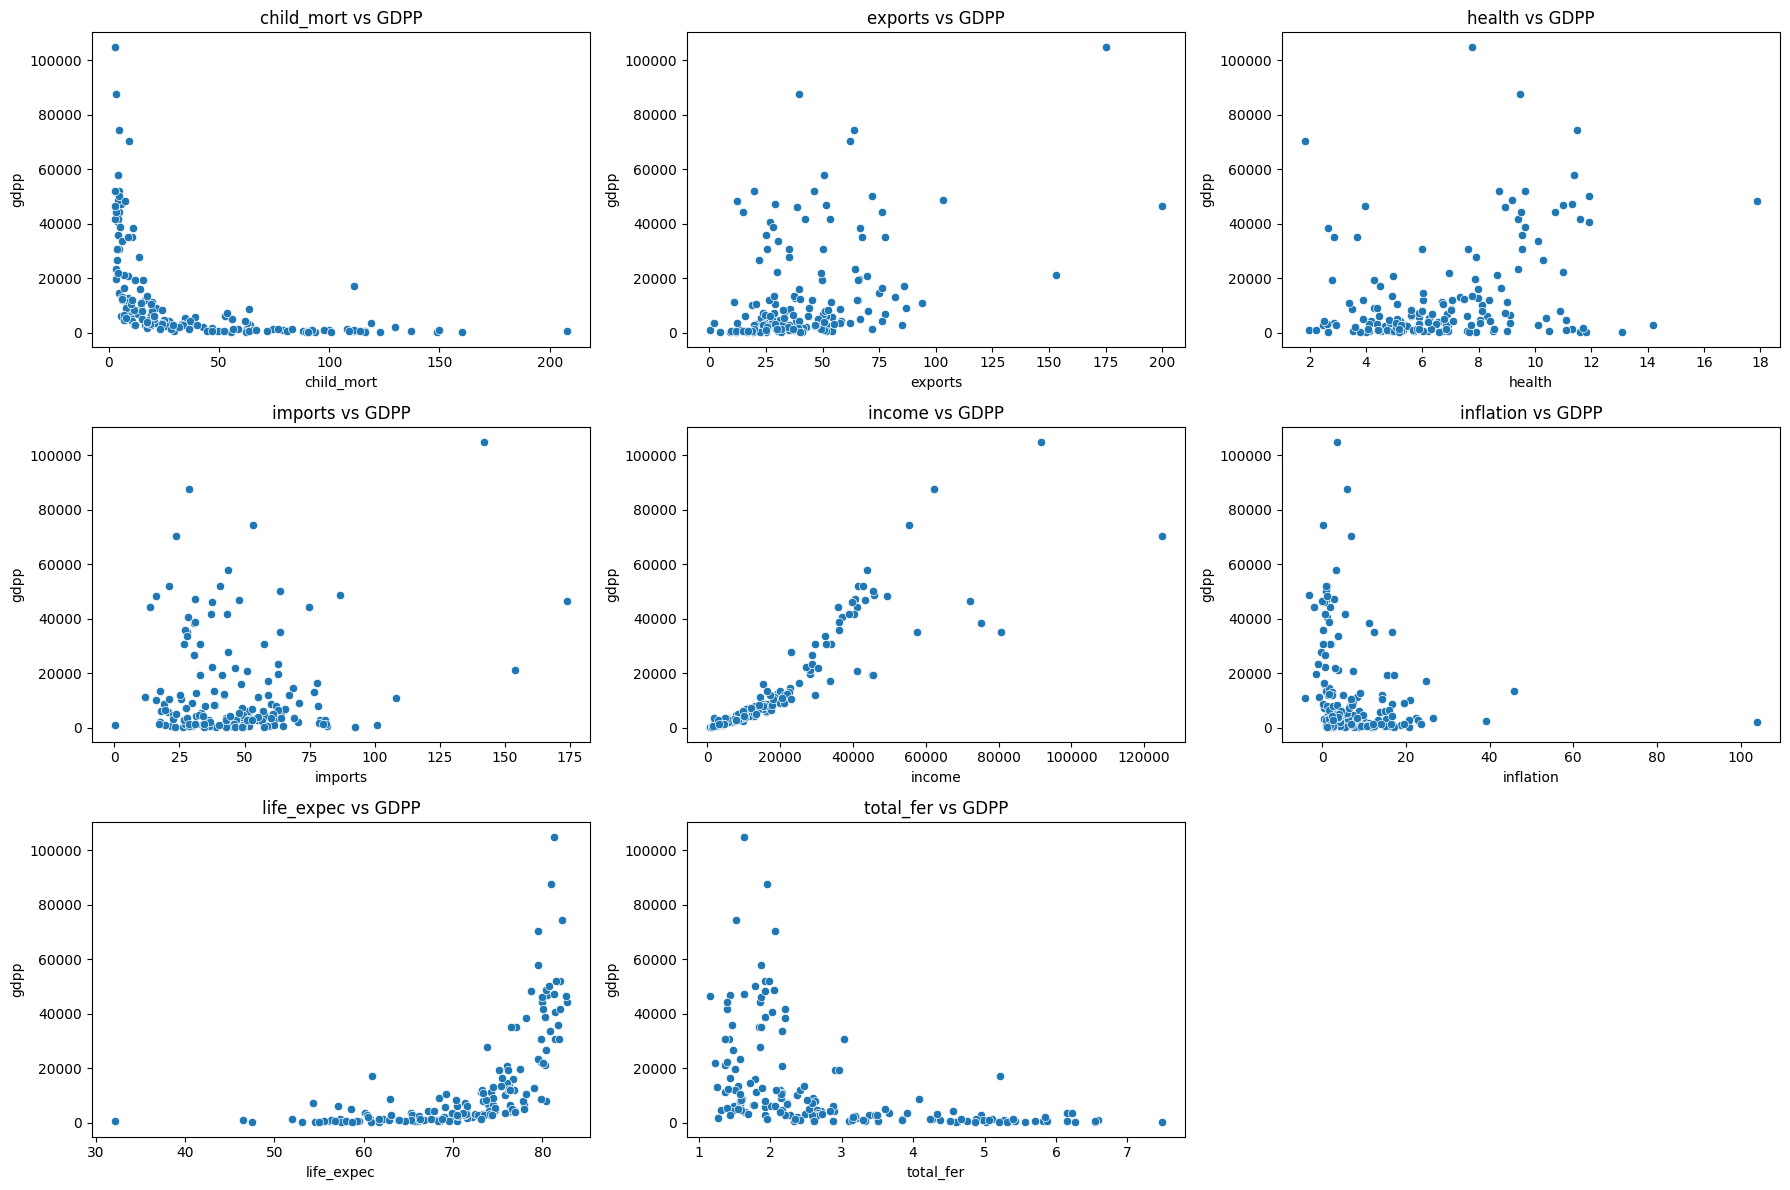

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to plot against GDPP.
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Create scatter plots.
plt.figure(figsize=(18, 12))
for i, feature in enumerate(features[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=data[feature], y=data['gdpp'])
    plt.title(f'{feature} vs GDPP')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler.
scaler = MinMaxScaler()

# Apply the scaler to the entire dataset.
scaled_data = scaler.fit_transform(data)

# Convert back to a DataFrame for easier handling.
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

# Display the first few rows to verify scaling.
scaled_data.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


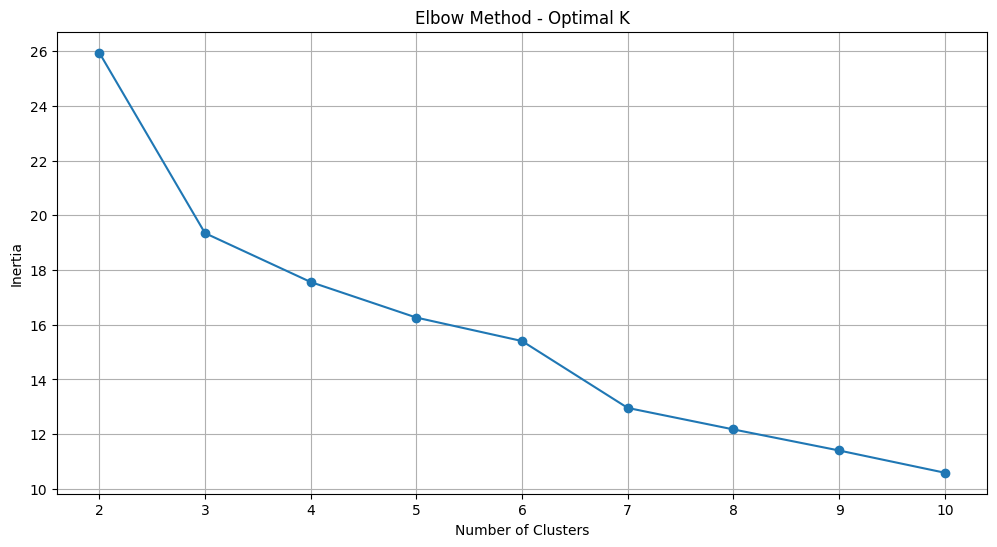

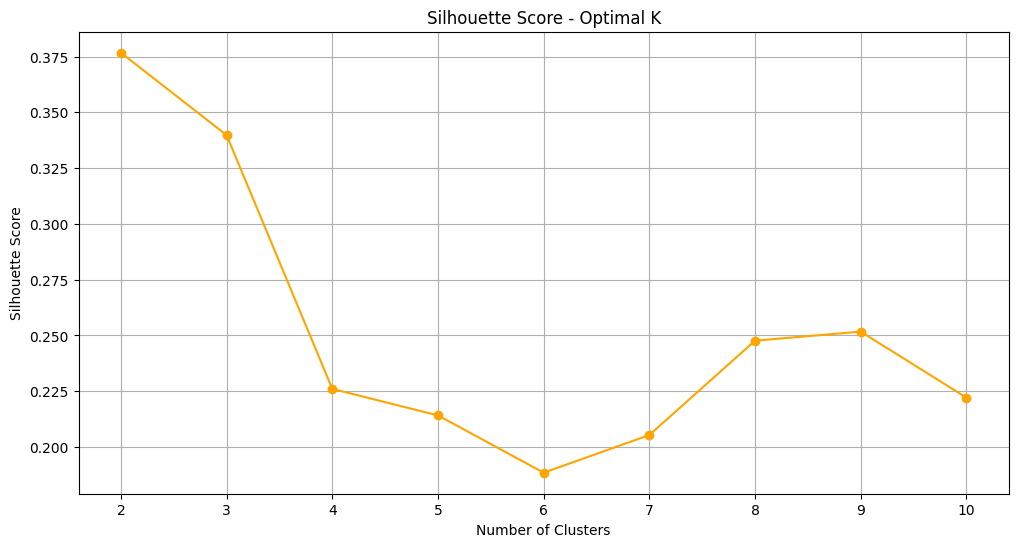

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Elbow Method
inertia = []
silhouette_scores = []

# Test for cluster range 2 to 10.
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    # Calculate silhouette score for each k.
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Elbow Curve.
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Plot the Silhouette Scores.
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score - Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


In [ ]:
# Optimal number of clusters based on the elbow method and silhouette score.
# Assuming the elbow point is at 3 clusters and silhouette score is highest at 3.
optimal_k = 3

# Initialize and fit KMeans.
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Assign cluster labels
scaled_data['Cluster'] = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_data.drop('Cluster', axis=1), scaled_data['Cluster'])
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')


Silhouette Score for 3 clusters: 0.33976487765323604


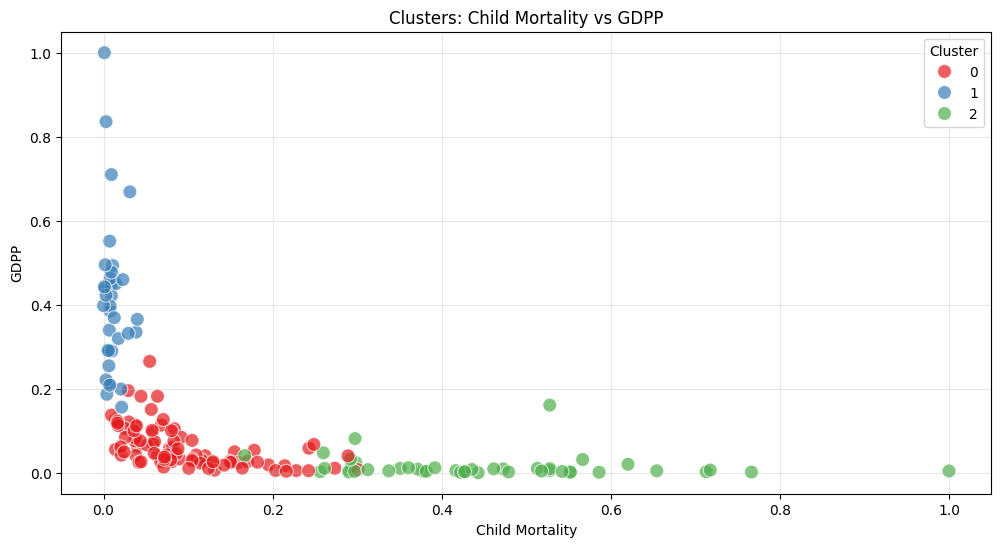

In [ ]:
# Plot Child Mortality vs GDPP.
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=scaled_data['child_mort'],
    y=scaled_data['gdpp'],
    hue=scaled_data['Cluster'],
    palette='Set1',
    s=100,
    alpha=0.7
)
plt.title('Clusters: Child Mortality vs GDPP')
plt.xlabel('Child Mortality')
plt.ylabel('GDPP')
plt.grid(alpha=0.3)
plt.show()


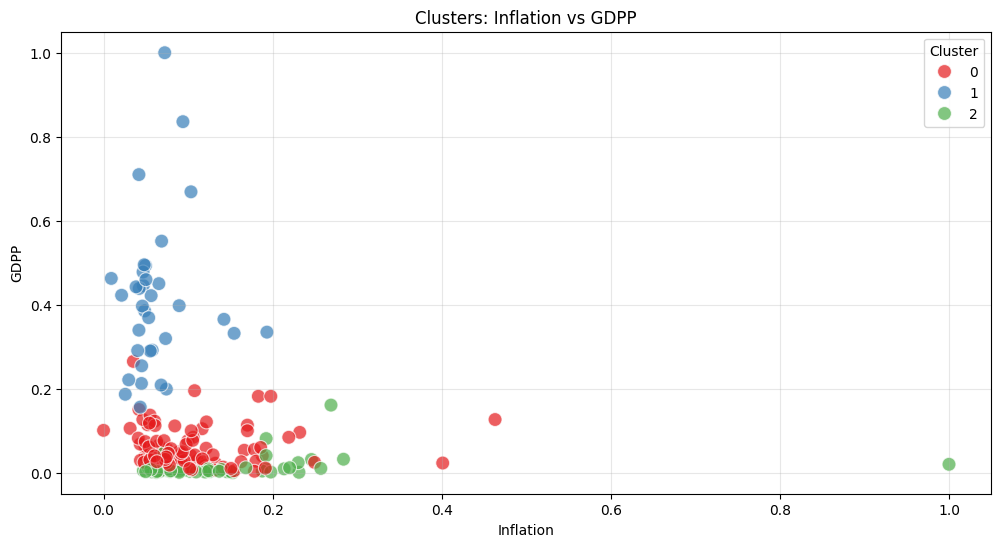

In [14]:
# Plot Inflation vs GDPP
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=scaled_data['inflation'],
    y=scaled_data['gdpp'],
    hue=scaled_data['Cluster'],
    palette='Set1',
    s=100,
    alpha=0.7
)
plt.title('Clusters: Inflation vs GDPP')
plt.xlabel('Inflation')
plt.ylabel('GDPP')
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# Calculate the mean values for each cluster.
cluster_means = scaled_data.groupby('Cluster').mean()
print(cluster_means[['gdpp', 'child_mort', 'inflation']])


             gdpp  child_mort  inflation
Cluster                                 
0        0.061339    0.096839   0.109138
1        0.409340    0.011184   0.062333
2        0.014068    0.448556   0.151784


In [ ]:
# Assign labels based on observed characteristics.
labels = {
    0: 'Developed/High Income',
    1: 'Developing/Middle Income',
    2: 'Least Developed/Low Income'
}

# Map the labels.
scaled_data['Label'] = scaled_data['Cluster'].map(labels)

# Display the labeled dataset.
scaled_data.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,Label
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,2,Least Developed/Low Income
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0,Developed/High Income
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0,Developed/High Income
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,2,Least Developed/Low Income
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0,Developed/High Income


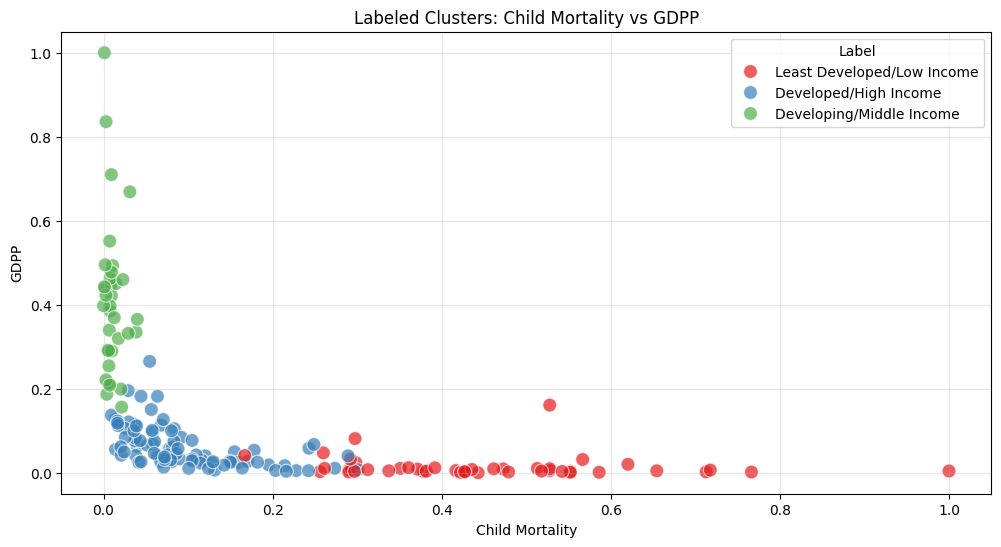

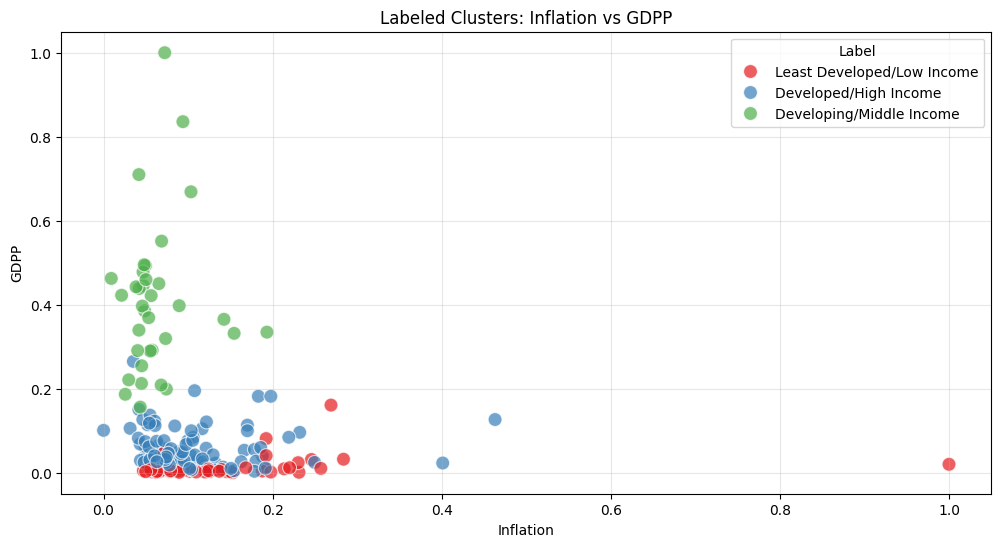

In [ ]:
# Plot Child Mortality vs GDPP with labels.
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=scaled_data['child_mort'],
    y=scaled_data['gdpp'],
    hue=scaled_data['Label'],
    palette='Set1',
    s=100,
    alpha=0.7
)
plt.title('Labeled Clusters: Child Mortality vs GDPP')
plt.xlabel('Child Mortality')
plt.ylabel('GDPP')
plt.grid(alpha=0.3)
plt.show()

# Plot Inflation vs GDPP with labels.
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=scaled_data['inflation'],
    y=scaled_data['gdpp'],
    hue=scaled_data['Label'],
    palette='Set1',
    s=100,
    alpha=0.7
)
plt.title('Labeled Clusters: Inflation vs GDPP')
plt.xlabel('Inflation')
plt.ylabel('GDPP')
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# Summary of Findings

# The analysis of the dataset reveals the following insights:

# 1. **Clustering and Grouping**:
#    - Using KMeans clustering, the dataset was divided into three distinct clusters based on socio-economic indicators.
#    - The silhouette score for the clustering was 0.34, indicating a moderate level of separation between clusters.

# 2. **Cluster Characteristics**:
#    - Cluster 0 represents "Developed/High Income" countries, characterized by high GDP per capita, low child mortality, and high life expectancy.
#    - Cluster 1 represents "Developing/Middle Income" countries, with moderate GDP per capita, moderate child mortality, and improving life expectancy.
#    - Cluster 2 represents "Least Developed/Low Income" countries, with low GDP per capita, high child mortality, and low life expectancy.

# 3. **Key Relationships**:
#    - Child mortality and GDP per capita show a strong negative correlation, with higher child mortality rates observed in countries with lower GDP per capita.
#    - Inflation and GDP per capita also exhibit a negative relationship, with higher inflation rates associated with lower GDP per capita.

# 4. **Cluster Averages**:
#    - The mean values for key indicators like GDP per capita, child mortality, and inflation were calculated for each cluster, providing a clear picture of the socio-economic differences between the groups.

# 5. **Visualization**:
#    - Scatter plots of key indicators (e.g., child mortality vs. GDP per capita, inflation vs. GDP per capita) were used to visualize the clustering and highlight the differences between groups.

# Overall, the analysis provides a clear segmentation of countries based on socio-economic indicators, offering valuable insights into global development patterns and disparities.